In [18]:
import torch
import matplotlib.pyplot as plt

from m2_utilities.load_data import load_trajectories
from m2_utilities.preprocessor import tokenize, detokenize, destringify
from m2_utilities.qwen import load_qwen

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the Model and Data

In [2]:
# Model
model, tokenizer = load_qwen()

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


In [3]:
# Data
unscaled_trajectories = load_trajectories("data/lotka_volterra_data.h5")

# Scaling
ALPHA = 1.5
trajectories = unscaled_trajectories / ALPHA

### Testing an Input

In [26]:
system_id = 0
traj = trajectories[system_id]

# First 50 points
traj_50 = traj[:50]

# Tokenizing
traj_50_tokens = tokenize(traj_50, decimals=2)

# Reshape for input into the network
traj_50_tokens = traj_50_tokens.reshape(1, -1)

In [27]:
output = model.generate(traj_50_tokens, max_new_tokens=100, do_sample=False)
output = output.reshape(-1)

In [31]:
predictions = detokenize(output)

torch.Size([60, 2])


torch.Size([110, 2])


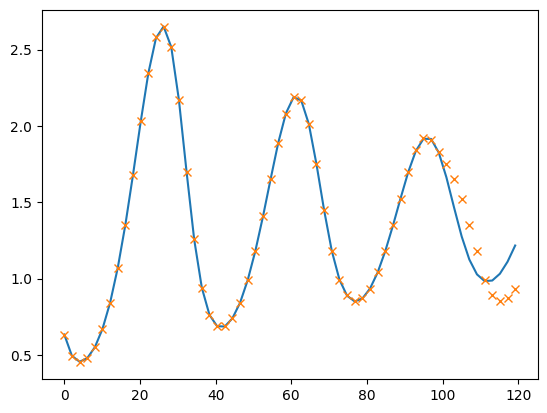

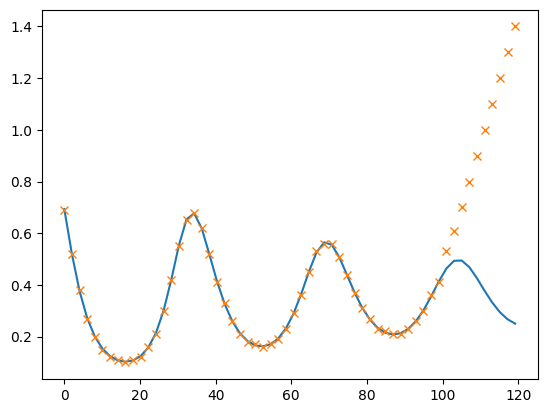

In [40]:
times = torch.linspace(0, 200, 100)
times = times[:len(predictions)]


pred_true = traj[:len(predictions), 0]
prey_true = traj[:len(predictions), 1]

pred_predicted = predictions[:, 0]
prey_predicted = predictions[:, 1]

print(prediction.shape)

plt.plot(times, pred_true)
plt.plot(times, pred_predicted, "x")
plt.show()

plt.plot(times, prey_true)
plt.plot(times, prey_predicted, "x")
plt.show()